In [1]:
import requests 
import pandas as pd
from requests.auth import HTTPBasicAuth 
import io
import numpy as np

In [2]:
API_key = "ak_OwrA8qVxzrfKs8UDhvbV" 

## 1) Download the original file from Alphacast

In [50]:
#Define the url for the request, the id and the extension of the dataset
url = "https://charts.alphacast.io/api/datasets/"
dataset = '7337'
extension = '.csv'

#Make the request and read the info
r = requests.get(url + dataset + extension, auth=HTTPBasicAuth(API_key, "")) 
df = pd.read_csv(io.StringIO(r.content.decode('utf-8')))

df = df.set_index('Year')
df

,Entity,Balance - Goods 1,Balance - Services,Exports - Total,Exports - Goods 1,Exports - Services,Imports - Total,Imports - Goods 1,Imports - Services,Balance - Total
Year,,,,,,,,,,
1992-01-01,USA,-6952,4926,50251,35498,14753,52277,42450,9827,-2026
1992-02-01,USA,-5593,4762,51682,36854,14828,52513,42447,10066,-831
1992-03-01,USA,-7355,4714,50294,35711,14583,52935,43066,9869,-2641
1992-04-01,USA,-8284,5175,50302,35439,14863,53411,43723,9688,-3109
1992-05-01,USA,-8720,4801,50044,35403,14641,53963,44123,9840,-3919
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,USA,-89155,18513,188561,130436,58125,259203,219591,39612,-70643
2021-03-01,USA,-92859,17834,202669,143658,59011,277693,236516,41177,-75025
2021-04-01,USA,-86873,17802,204704,145088,59615,273775,231961,41814,-69071


## 2) Transformation: Hodrick Prescott filter

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

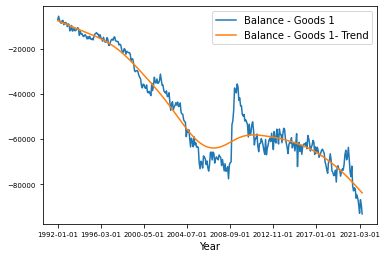

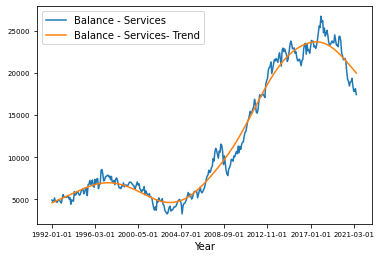

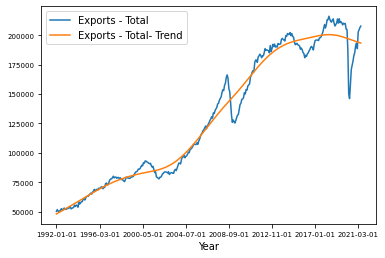

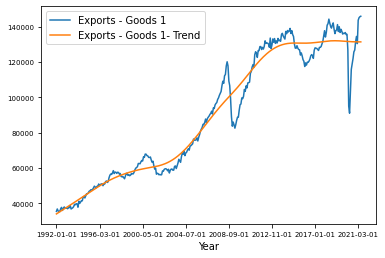

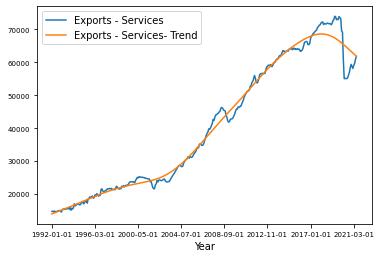

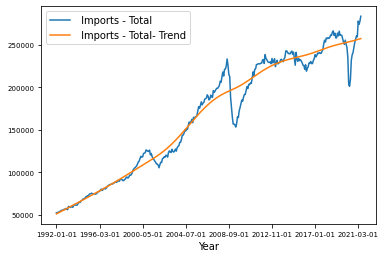

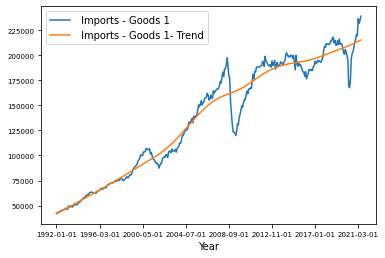

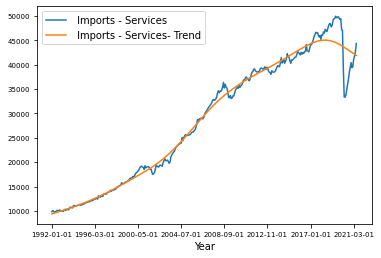

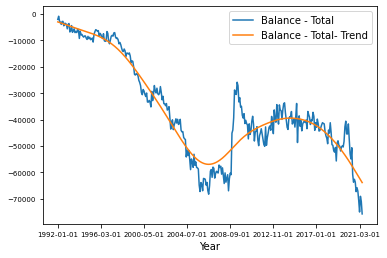

In [43]:
#Create a dataframe to save the transformed info
df_hp = pd.DataFrame()

#Apply the HP filter on each of the columns of the dataframe
for col in df.columns[1:]:
    target = df[col]
    cycle, trend = sm.tsa.filters.hpfilter(target, 129600)
    
    #Store the results
    df_hp[col] = df[col]
    df_hp[col+ '- Cycle'] = cycle
    df_hp[col+ '- Trend'] = trend
    
    #Plot the series
    fig, ax = plt.subplots()
    df_hp[[col, col+ '- Trend']]['1992-01-01':].plot(ax=ax, fontsize=7)
    plt.show()

In [44]:
#Print the transformed dataframe
pd.set_option('display.max_columns', None)
df_hp

,Balance - Goods 1,Balance - Goods 1- Cycle,Balance - Goods 1- Trend,Balance - Services,Balance - Services- Cycle,Balance - Services- Trend,Exports - Total,Exports - Total- Cycle,Exports - Total- Trend,Exports - Goods 1,Exports - Goods 1- Cycle,Exports - Goods 1- Trend,Exports - Services,Exports - Services- Cycle,Exports - Services- Trend,Imports - Total,Imports - Total- Cycle,Imports - Total- Trend,Imports - Goods 1,Imports - Goods 1- Cycle,Imports - Goods 1- Trend,Imports - Services,Imports - Services- Cycle,Imports - Services- Trend,Balance - Total,Balance - Total- Cycle,Balance - Total- Trend
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,
1992-01-01,-6952,625.395792,-7577.395792,4926,323.952357,4602.047643,50251,2209.402900,48041.597100,35498,1438.676329,34059.323671,14753,770.732412,13982.267588,52277,1260.035186,51016.964814,42450,813.255087,41636.744913,9827,446.782972,9380.217028,-2026,949.345628,-2975.345628
1992-02-01,-5593,2145.705703,-7738.705703,4762,114.112245,4647.887755,51682,3227.589610,48454.410390,36854,2484.237520,34369.762480,14828,743.357904,14084.642096,52513,967.756166,51545.243834,42447,338.510480,42108.489520,10066,629.248482,9436.751518,-831,2259.815328,-3090.815328
1992-03-01,-7355,545.010790,-7900.010790,4714,20.269633,4693.730367,50294,1426.759271,48867.240729,35711,1030.787611,34680.212389,14583,395.977450,14187.022550,52935,861.467424,52073.532576,43066,485.759597,42580.240403,9869,375.710545,9493.289455,-2641,565.277702,-3206.277702
1992-04-01,-8284,-222.710332,-8061.289668,5175,435.421142,4739.578858,50302,1021.869933,49280.130067,35439,448.296332,34990.703668,14863,573.579366,14289.420634,53411,809.151770,52601.848230,43723,670.993552,43052.006448,9688,138.160857,9549.839143,-3109,212.707990,-3321.707990
1992-05-01,-8720,-497.483248,-8222.516752,4801,15.563234,4785.436766,50044,350.868634,49693.131366,35403,101.725459,35301.274541,14641,249.148913,14391.851087,53963,832.785367,53130.214633,44123,599.199709,43523.800291,9840,233.588218,9606.411782,-3919,-481.922934,-3437.077066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,-89155,-6986.351511,-82168.648489,18513,-1961.080660,20474.080660,188561,-5700.919744,194261.919744,130436,-985.045950,131421.045950,58125,-4715.762991,62840.762991,259203,3246.639581,255956.360419,219591,6001.334317,213589.665683,39612,-2754.741314,42366.741314,-70643,-8948.465939,-61694.534061
2021-03-01,-92859,-10268.993763,-82590.006237,17834,-2519.110115,20353.110115,202669,8652.083494,194016.916506,143658,12241.360775,131416.639225,59011,-3589.164483,62600.164483,277693,21439.316260,256253.683740,236516,22509.382678,214006.617322,41177,-1070.113566,42247.113566,-75025,-12788.135970,-62236.864030
2021-04-01,-86873,-3861.302578,-83011.697422,17802,-2430.030988,20232.030988,204704,10931.469656,193772.530344,145088,13675.106654,131412.893346,59615,-2744.522204,62359.522204,273775,17222.933853,256552.066147,231961,17536.436754,214424.563246,41814,-313.550631,42127.550631,-69071,-6291.363996,-62779.636004


## 3) Upload transformed data to Alphacast

### 3.1) Create a repository

In [45]:
#Define the url for the request, and the parameters of the repo
url = "https://api.alphacast.io/repositories"

form = {
   "name": "Maca test - v2",
   "description": "This is a test repository for the Webinar",
   "privacy": "Private", 
   "slug": "test-repo - v2"
}

r = requests.post(url, data=form, auth=HTTPBasicAuth(API_key, ""))

#To print the details of the new repo
pd.DataFrame(eval(r.content.decode('utf-8')), index=[0])

,message
0,"(1062, ""Duplicate entry '158-test-repo - v2' f..."


### 3.2) Create a dataset

In [46]:
#Define the url for the request, and the parameters of the dataset
url = "https://api.alphacast.io/datasets"

form = {
   "name": "USA Trade Balance - HP",
   "repositoryId": 945,
    "description": "USA 1992-2020 monthly trade balance series with Hodrick-Prescott filter applied"
}

r = requests.post(url, auth=HTTPBasicAuth(API_key, ""), data=form)

#Print the details of the new dataset
pd.DataFrame(eval(r.content.decode('utf-8')), index=[0])

,message
0,"(1062, ""Duplicate entry 'USA Trade Balance - H..."


### 3.3) Uploading data 

The API to upload data to a dataset requires two parameters:

* **deleteMissingFromDB**: True / False. This parameter indicates, if True, that if the data that was in the dataset is not in the new data being uploaded, it should be deleted from the database.
* **onConflictUpdateDB**: True / False. This parameter indicates, if True, that if there is a conflict between the data that is already in the database and the new ones, it keeps the new data and overwrites the previous ones.

In [49]:
url_base = 'https://api.alphacast.io/datasets/'
dataset_id = '7334'
additional_params = '/data?deleteMissingFromDB=True&onConflictUpdateDB=True'

url = url_base + dataset_id + additional_params

files = {'data': df_hp.to_csv()}

r = requests.put(url, files=files, auth=HTTPBasicAuth(API_key, ""))

pd.DataFrame(eval(r.content.decode('utf-8')), index=[0])

,id,status,createdAt,datasetId
0,6595,Requested,2021-08-31T19:58:42.706847,7334
